# Code for Creating the dataset for the NMF Simulation

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, imsave
from skimage.util import random_noise
import os

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Declaring helper functions

In [23]:
def imageread(filename):
    img = cv2.imread(filename)
    b,g,r = cv2.split(img)           # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    return rgb_img

def noisy_image(img,s):
    n = random_noise(img, mode='gaussian', seed=None, clip=True, var = s)
    n = np.uint8(n*255)
    return n
    
def denoise_in_area(image, center, radius = 0):
    # Return the image denoised in an area, which is a disk of radius n and center.
    n = radius
    r = int(np.round(n))
    x,y = center
    area2bdenoised = image[x-r:x+r, y-r:y+r]
    area_denoised = cv2.fastNlMeansDenoisingColored(area2bdenoised,None,10,10,7,21)
    for i in range(x-r,x+r):
        for j in range(y-r,y+r):
            if (x-i)**2 + (y-j)**2 <= r**2:
                image[i,j] = area_denoised[i-x+r, j-y+r]

def remove_noise_in_area(image, original_image, center, radius = 0):
    n = radius
    r = int(np.round(n))
    x,y = center
    for i in range(x-r,x+r):
        for j in range(y-r,y+r):
            if (x-i)**2 + (y-j)**2 <= r**2:
                image[i,j] = original_image[i,j]
    return image

Read the image, and display the initial image:

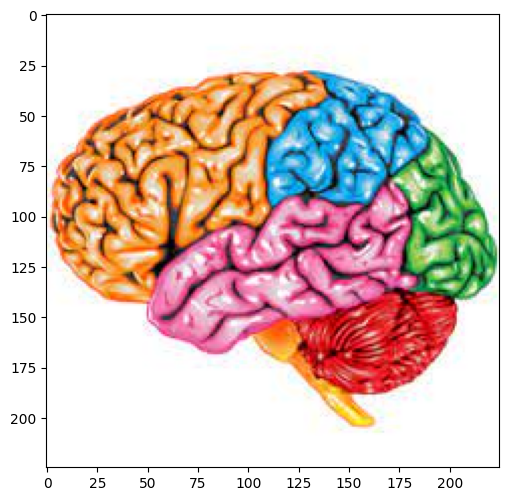

In [24]:
img_arr = imageread("brain_image_base.jpg")
imshow(img_arr)

 Add noise, and display the processed image:

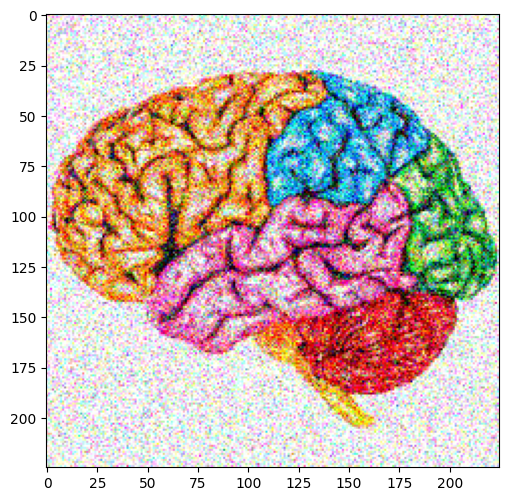

In [32]:
noise_img1 = noisy_image(img_arr, 0.05)
noise_img2 = np.array(noise_img1)
imshow(noise_img1)

Now try to remove some of the noise from specific areas:

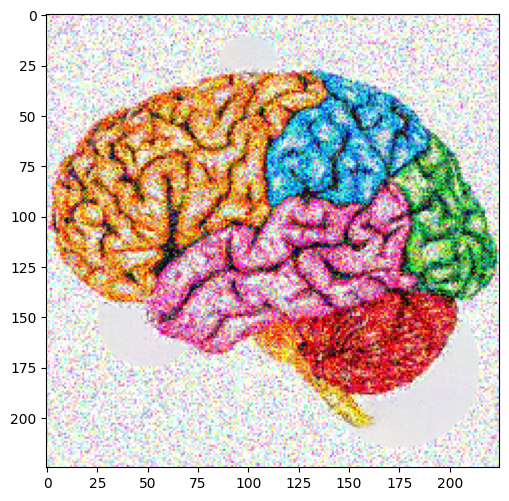

In [33]:
denoise_in_area(noise_img1, (150,50), radius = 25)
denoise_in_area(noise_img1, (175,175), radius = 40)
denoise_in_area(noise_img1, (25, 100), radius = 15)
imshow(noise_img1)

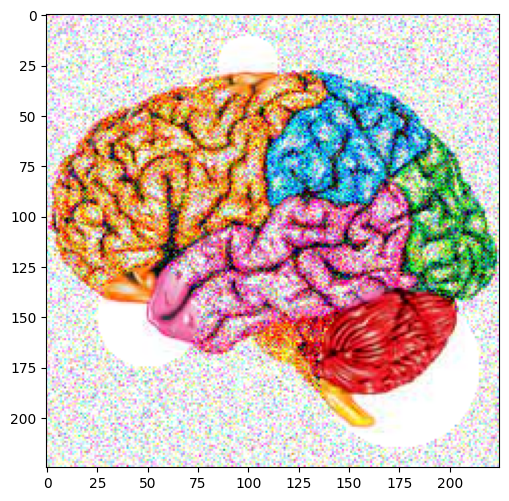

In [34]:
cleaned = remove_noise_in_area(noise_img2, img_arr, (150,50), radius = 25)
cleaned = remove_noise_in_area(noise_img2, img_arr, (175,175), radius = 40)
cleaned = remove_noise_in_area(noise_img2, img_arr, (25, 100), radius = 15)

imshow(cleaned)

In [35]:
os.mkdir("Noisy")
os.mkdir("Denoised")
os.mkdir("Noise_removed")

os.chdir("Noisy")
for i in range(150):
    noise_img = noisy_image(img_arr, 0.05)
    imsave('noisy_'+str(i+1)+'.jpeg', noise_img, format = 'jpeg')

os.chdir("../Noise_removed")
for i in range(100):
    noise_img = noisy_image(img_arr, 0.05)
    cleaned = remove_noise_in_area(noise_img, img_arr, (150,50), radius = 25)
    cleaned = remove_noise_in_area(noise_img, img_arr, (175,175), radius = 40)
    cleaned = remove_noise_in_area(noise_img, img_arr, (25, 100), radius = 15)
    imsave('removed_'+str(i+1)+'.jpeg', cleaned, format = 'jpeg')

os.chdir("../Denoised")   
for i in range(100):
    noise_img = noisy_image(img_arr, 0.05)
    denoise_in_area(noise_img, (150,50), radius = 25)
    denoise_in_area(noise_img, (175,175), radius = 40)
    denoise_in_area(noise_img, (25, 100), radius = 15)
    imsave('denoised_'+str(i+1)+'.jpeg', noise_img, format = 'jpeg')

os.chdir("..")